<a href="https://colab.research.google.com/github/nepatiess/Global_AI-Hub_Machine_Learning/blob/main/G%C3%B6zetimli_ve_g%C3%B6zetimsiz_%C3%B6%C4%9Frenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Veri Seti Yükleme ve Kriterleri Kontrol Etme

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
# Dosya adı ve yolu
file_path = "complete.csv"

# Dosyanın varlığını kontrol et
if os.path.exists(file_path):
    # Veri çerçevesini doğru şekilde yükleyin
    df1 = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

    # Veri çerçevesinin türünü kontrol et
    print(type(df1))  # Bu <class 'pandas.core.frame.DataFrame'> olmalı
else:
    print(f"{file_path} dosyası bulunamadı.")

if os.path.exists(file_path):
    print(f"{file_path} dosyası başarıyla yüklendi.")

<class 'pandas.core.frame.DataFrame'>
complete.csv dosyası başarıyla yüklendi.


In [20]:
# Veri seti boyutunu kontrol etme
def is_file_size_greater_than_10MB(file_path):
    file_size_MB = os.path.getsize(file_path) / (1024 * 1024)
    return file_size_MB > 10

# Veri seti satır sayısını kontrol etme
def has_at_least_10000_data_points(file_path):
    df = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)
    return len(df) >= 10000

# Veri setini yükle ve kontrol et
if file_path and is_file_size_greater_than_10MB(file_path) and has_at_least_10000_data_points(file_path):
    print("Veri seti kriterlere uygundur.")
    # Hatalı satırları atlayarak veri setini yükle
    df1 = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)
else:
    print("Veri seti kriterlere uygun değildir veya dosya bulunamadı.")
    df1 = None

Veri seti kriterlere uygundur.


## Veri Seti Analizi

In [21]:
# Veri Seti Genel Özellikleri
def analyze_dataset(df, dataset_name):
    if df is not None:
        print(f"\n{dataset_name} - Veri seti analizi:")

        # Satır ve sütun sayısı
        print(f"Satır sayısı: {df.shape[0]}")
        print(f"Sütun sayısı: {df.shape[1]}")

        # İlk 5 satırı görüntüle
        print("\nİlk 5 satır:")
        print(df.head())

        # Veri tipleri
        print("\nVeri tipleri:")
        print(df.dtypes)

        # Eksik veriler
        print("\nEksik veri sayısı (her sütun için):")
        print(df.isnull().sum())

        # Betimsel İstatistikler
        print("\nBetimsel İstatistikler:")
        print(df.describe())

        # Tekrarlayan satır sayısı
        print("\nTekrarlayan satır sayısı:")
        print(df.duplicated().sum())
    else:
        print("Veri seti yüklenmediği için analiz yapılamaz.")

# Veri seti analizi
if df1 is not None:
    analyze_dataset(df1, "Complete Veri Seti")


Complete Veri Seti - Veri seti analizi:
Satır sayısı: 88679
Sütun sayısı: 11

İlk 5 satır:
           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/20

## Veri Görselleştirme

<ipython-input-22-657829289052>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


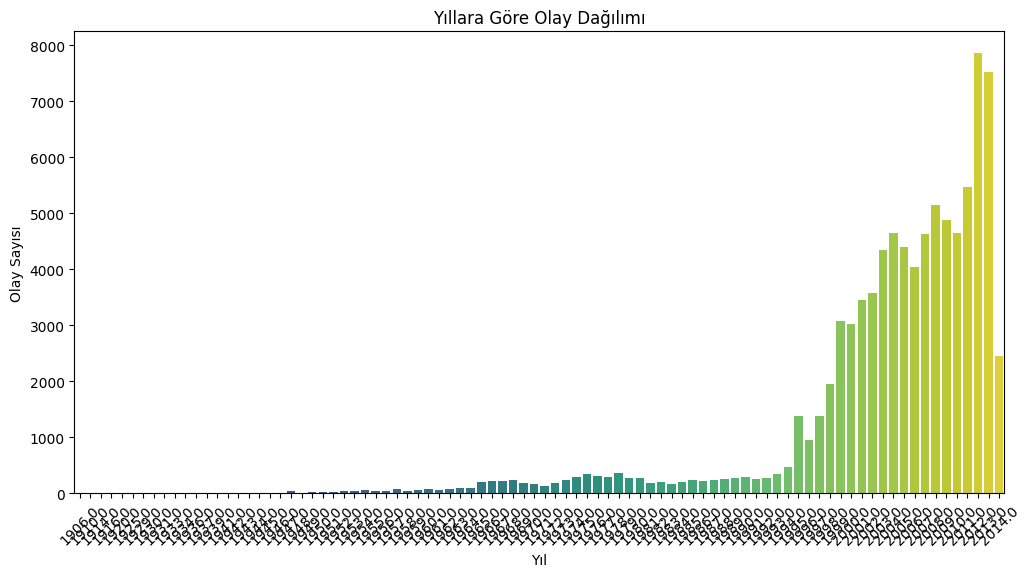

<ipython-input-22-657829289052>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


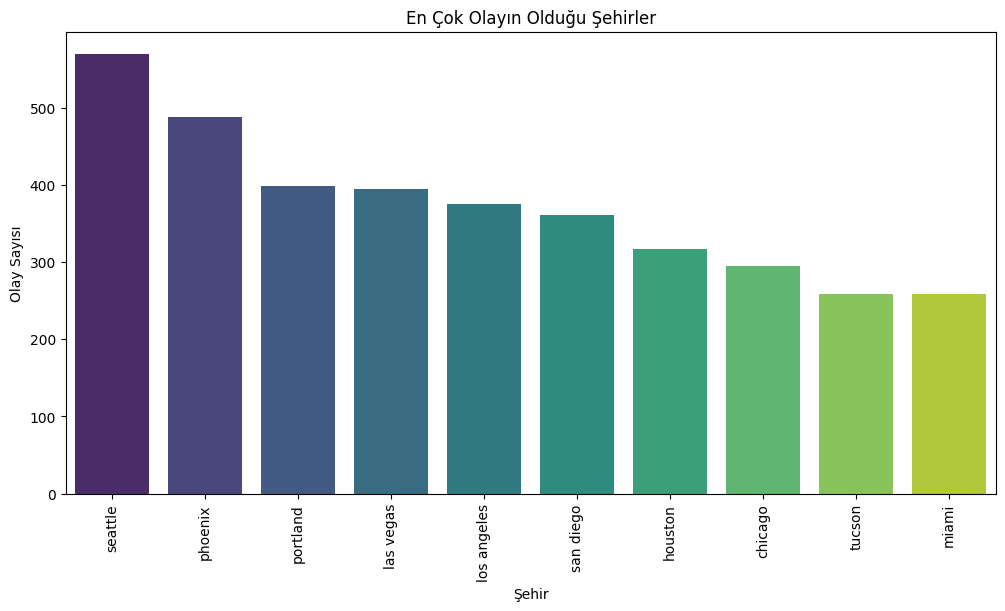

<ipython-input-22-657829289052>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


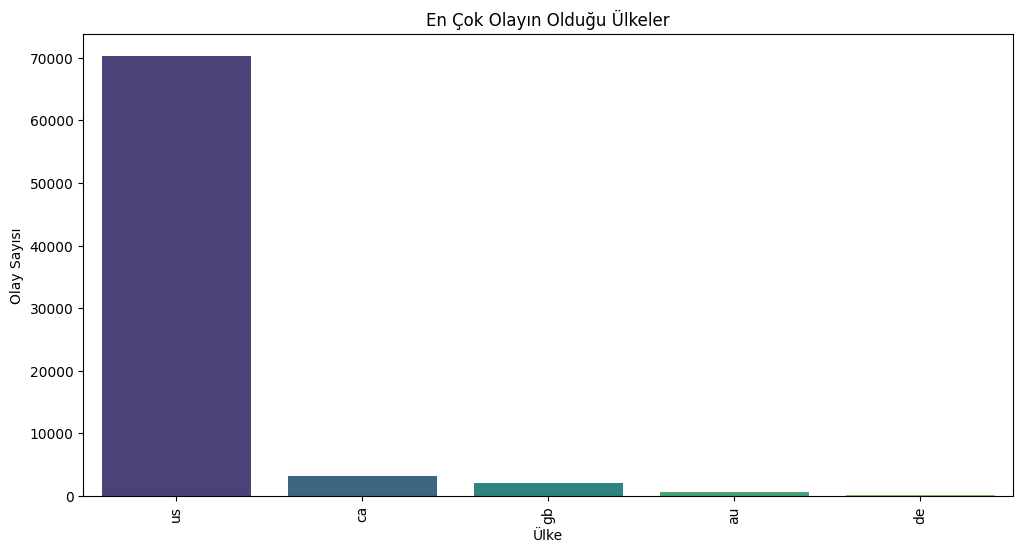

<ipython-input-22-657829289052>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='shape', palette='viridis', order=df['shape'].value_counts().index)


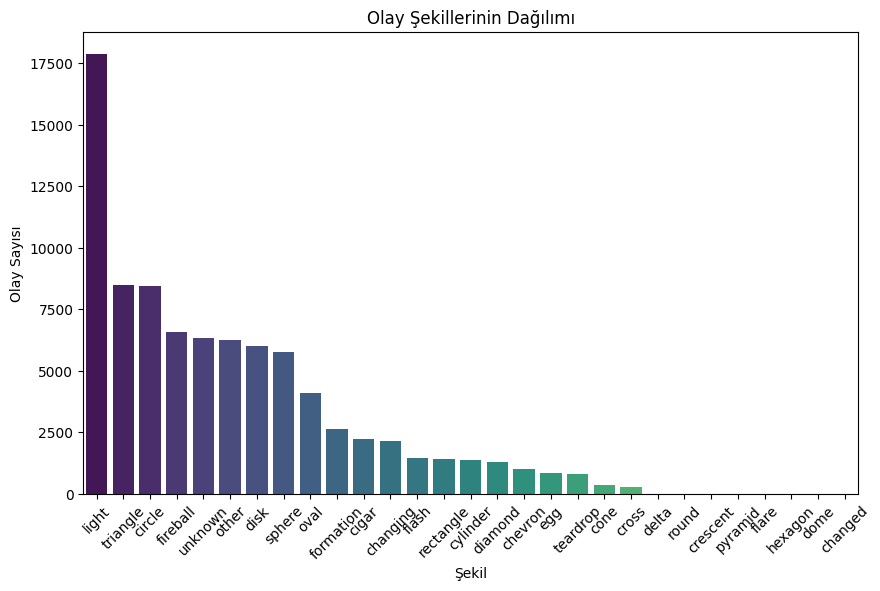

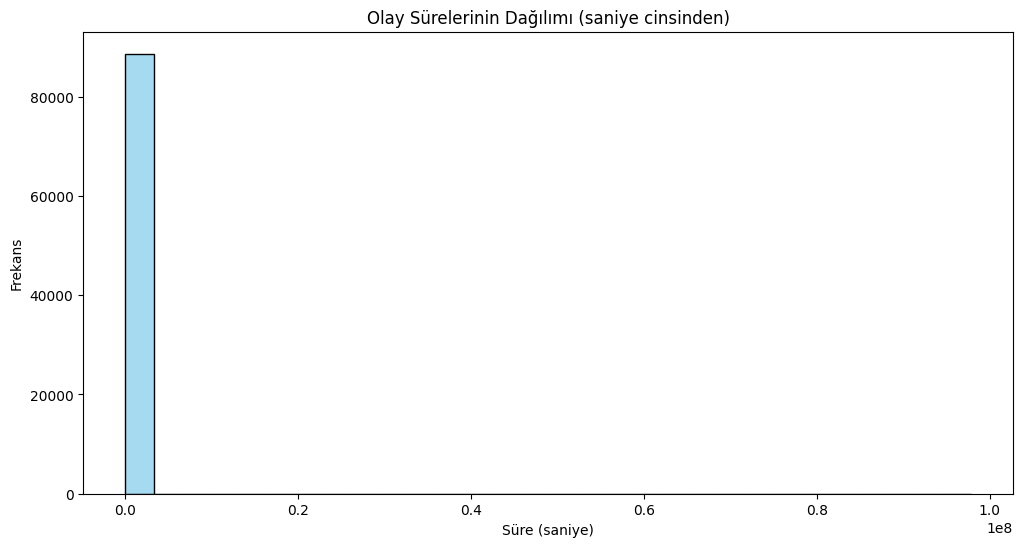

In [22]:
# 1. Zamanla Olaya Göre Dağılım
def plot_event_over_time(df):
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df['year'] = df['datetime'].dt.year
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='year', palette='viridis')
    plt.title('Yıllara Göre Olay Dağılımı')
    plt.xticks(rotation=45)
    plt.xlabel('Yıl')
    plt.ylabel('Olay Sayısı')
    plt.show()

plot_event_over_time(df1)

# 2. Şehir ve Ülke Dağılımı
def plot_city_country_distribution(df):
    plt.figure(figsize=(12, 6))
    city_counts = df['city'].value_counts().head(10)  # En çok olayın olduğu 10 şehir
    sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
    plt.title('En Çok Olayın Olduğu Şehirler')
    plt.xticks(rotation=90)
    plt.xlabel('Şehir')
    plt.ylabel('Olay Sayısı')
    plt.show()

    plt.figure(figsize=(12, 6))
    country_counts = df['country'].value_counts().head(10)  # En çok olayın olduğu 10 ülke
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
    plt.title('En Çok Olayın Olduğu Ülkeler')
    plt.xticks(rotation=90)
    plt.xlabel('Ülke')
    plt.ylabel('Olay Sayısı')
    plt.show()

plot_city_country_distribution(df1)

# 3. Şekil Dağılımı
def plot_shape_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='shape', palette='viridis', order=df['shape'].value_counts().index)
    plt.title('Olay Şekillerinin Dağılımı')
    plt.xticks(rotation=45)
    plt.xlabel('Şekil')
    plt.ylabel('Olay Sayısı')
    plt.show()

plot_shape_distribution(df1)

# 4. Süre Dağılımı (saniye cinsinden)
def plot_duration_distribution(df):
    df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
    plt.figure(figsize=(12, 6))
    sns.histplot(df['duration (seconds)'].dropna(), bins=30, color='skyblue')
    plt.title('Olay Sürelerinin Dağılımı (saniye cinsinden)')
    plt.xlabel('Süre (saniye)')
    plt.ylabel('Frekans')
    plt.show()

plot_duration_distribution(df1)

## Veri Ön İşleme

In [23]:
# 1. Eksik Verileri İşleme
def preprocess_missing_values(df):
    # Eksik veri sayısına göre karar vererek, bazı sütunlardaki eksik verileri doldurma veya çıkarma
    df['state'].fillna('Unknown', inplace=True)  # Eksik 'state' değerlerini 'Unknown' ile doldur
    df['country'].fillna('Unknown', inplace=True)  # Eksik 'country' değerlerini 'Unknown' ile doldur
    df['shape'].fillna('Unknown', inplace=True)  # Eksik 'shape' değerlerini 'Unknown' ile doldur
    df['duration (seconds)'].replace('', np.nan, inplace=True)  # Boş değerleri NaN ile değiştir
    df.dropna(subset=['duration (seconds)'], inplace=True)  # NaN değerleri içeren satırları çıkar

    # 'comments' sütunundaki eksik değerleri 'No comment' ile doldur
    df['comments'].fillna('No comment', inplace=True)
    return df

# 2. Veri Türlerini Düzeltme
def convert_data_types(df):
    df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')  # Tarih ve saat formatı
    df['date posted'] = pd.to_datetime(df['date posted'], format='%m/%d/%Y', errors='coerce')  # Tarih formatı
    df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')  # Süreyi sayısal formata dönüştür
    return df

# 3. Tarih ve Saat Verilerini Düzeltme
def preprocess_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')
    df['date posted'] = pd.to_datetime(df['date posted'], format='%m/%d/%Y', errors='coerce')
    return df

# 4. Yeniden İndeksleme ve Temizlik
def clean_data(df):
    df.drop_duplicates(inplace=True)  # Tekrarlayan satırları kaldır
    df.reset_index(drop=True, inplace=True)  # İndeksi sıfırla
    return df

# Tüm işlemleri sırasıyla uygulama
df1 = preprocess_missing_values(df1)
df1 = convert_data_types(df1)
df1 = preprocess_datetime(df1)
df1 = clean_data(df1)

print("Veri seti ön işleme tamamlandı.")


Veri seti ön işleme tamamlandı.
